# 목차
[1. Accuracy](#1.-Accuracy)  
[2. 오차 행렬](#2.-오차-행렬)  
[3. Precision, Recall](#3.-Precision,-Recall)  
[4. F1 Score](#4.-F1-Score)  
[5. ROC Curve, AUC](#5.-ROC-Curve,-AUC)  
[6. 연습 문제](#6.-연습-문제)

#### 분류 모델 평가 지표
- 정확도(Accuracy)
- 재현율(Recall)
- 정밀도(Precision)
- F1 measure
- G measure
- ROC curve
- AUC

#### 회귀 모델 평가 지표
- MSE(Mean Square Error)
- RMSE(Root MSE)
- MAE(Mean Absolute Error)
- MAPE(Mean Absolute Percentage Error)
- $R^2$

# 1. Accuracy
- $Accuracy = \dfrac {sum(data==pred)}{len(data)}$

### 타이타닉 데이터

In [1]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing
def transform_featrues(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [2]:
import numpy as np
from sklearn.base import BaseEstimator

# 아무런 학습을 하지 않고 성별로만 생존하를 예측하는 Classifier 생성
# BestEstimator 상속 받음

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y):
        pass
    
    # predict() 메서드는 Sex==0 이면 1, Sex==1이면 0
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1)) # (행의 개수, 열의 개수)
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        
        return pred

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_featrues(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypred = myclf.predict(X_test)
print(f'Dummy Classifier의 정확도 : {accuracy_score(y_test, mypred):.4f}')

Dummy Classifier의 정확도 : 0.7877


### MNIST 데이터
- 7만 True, 나머지는 False인 불균형한 데이터 세트로 변형
- 정확도 맹점 : 아무것도 하지 않고 데이터가 많은 특정한 값만 찍어도 높은 수치가 나타남

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 모든 값을 0으로 예측
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digit data load

In [5]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# 새로운 label 생성
# 7이면 True, 아니면 False
# astype(int)로 7이면 1, 아니면 0
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y,
                                                   random_state=11)

MyFakeClassifier로 평가

In [9]:
# 불균형한 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', len(y_test))
print('테스트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# 학습/평가
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)
score = accuracy_score(y_test, fakepred)
print(f'모든 예측을 0으로 하여도 정확도는 : {score:.3f}')

레이블 테스트 세트 크기 : 450
테스트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


# 2. 오차 행렬
| 실제 / 예측 | Negative | Positive |
| ----------- | -------- | -------- |
| **Negative**    | TN       | FP       |
| **Positive**    | FN       | TP       |  

- 예측 기준으로 N/P가 정해지며
- 예측과 실제가 같으면 T 아니면 F
- 정확도 = (TN + TP) / (TN + FP + FN + TP)
- Positive 예시 : 불량품, 스팸메일, 암환자 등

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

# 3. Precision, Recall

- 불량품이나 암환자 등 분류 문제는 불균형한 데이터 (현저히 적은 수의 불량품/암환자)
- 불균형한 데이터를 학습시키면 TN은 매우 커지고 TP는 매우 작아지게 됨
- 그렇기 때문에 정밀도와 재현율이 필요함
- 정밀도 $Precision = \dfrac {TP} {FP + TP}$
    - Positive로 예측한 것 중 실제 Positive인 것의 비율
    - **스팸 메일**은 스팸(예측 P)이 아닌 정상 메일을 정상(실제 N)으로 분류하는 것이 더 중요
        - FP가 작아야함
    - 양성 예측도
- 재현율 $Recall = \dfrac {TP} {TP + FN}$
    - 실제 Positive인 것 중 Positive로 예측한 것의 비율
    - 실제 **암환자**(실제 P)를 암환자가 아니라고(예측 N) 하는 것이 없어야 함
        - FN이 작아야함
    - 민감도(Sensitivity) 또는 TPR(True Positive Rate)
![ConfusionMatrix](../data/confusionMatrix.png)



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 모든 값을 0으로 예측
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y,
                                                   random_state=11)
fake_clf = MyFakeClassifier()
fake_clf.fit(X_train, y_train)
fakepred = fake_clf.predict(X_test)
score = accuracy_score(y_test, fakepred)

In [12]:
# 정확도, 정밀도, 재현율 출력
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.3f}, 정밀도 : {precision:.3f}, 재현율 : {recall:.3f}')

In [14]:
get_clf_eval(y_test, fakepred)

오차 행렬
[[405   0]
 [ 45   0]]
정확도 : 0.900, 정밀도 : 0.000, 재현율 : 0.000


C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 타이타닉 데이터 Logistic Regression의 오차 행렬

In [18]:
from sklearn.linear_model import LogisticRegression
titanic_df = pd.read_csv('../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_featrues(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


C:\Users\master\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 분류 결정 임계값(Threshold)을 조정해서 정밀도나 재현율을 높일 수 있음

`predict_proba()`
- Logistic 회귀 결과는 확률로 반환하며 `.predict` 메서드는 임계값에 따라 0 또는 1로 바꿔 반환
- `.predict_proba` 메서드는 확률로 반환

In [19]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.46185119, 0.53814881],
       [0.87872149, 0.12127851],
       [0.87720969, 0.12279031],
       [0.88264434, 0.11735566],
       [0.85523667, 0.14476333],
       [0.88225732, 0.11774268],
       [0.88846118, 0.11153882],
       [0.20879223, 0.79120777],
       [0.78288283, 0.21711717],
       [0.36939347, 0.63060653]])

첫 번째 열은 0 (Negative) 확률  
두 번째 열은 1 (Positive) 확률

In [21]:
pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
pred_proba_result[:10]

array([[0.46185119, 0.53814881, 1.        ],
       [0.87872149, 0.12127851, 0.        ],
       [0.87720969, 0.12279031, 0.        ],
       [0.88264434, 0.11735566, 0.        ],
       [0.85523667, 0.14476333, 0.        ],
       [0.88225732, 0.11774268, 0.        ],
       [0.88846118, 0.11153882, 0.        ],
       [0.20879223, 0.79120777, 1.        ],
       [0.78288283, 0.21711717, 0.        ],
       [0.36939347, 0.63060653, 1.        ]])

### `Binarizer`를 이용하여 이진화
- `threshold` : 임계값보다 크면 1, 아니면 0 (같으면 0)

#### 1. threshold = .5

In [27]:
from sklearn.preprocessing import Binarizer

c_threshold = 0.5

# 1을 반환하는 임계치 기준 (두 번째 열)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = c_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787


#### 2. threshold = .4

In [28]:
c_threshold = 0.4

# 1을 반환하는 임계치 기준 (두 번째 열)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = c_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832, 정밀도 : 0.718, 재현율 : 0.836


정밀도는 낮아지고 재현율은 높아짐
- 임계치가 낮아지면서 Positive 예측 수 증가

#### 3. threshold =.6

In [29]:
c_threshold = 0.6

# 1을 반환하는 임계치 기준 (두 번째 열)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = c_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877, 정밀도 : 0.882, 재현율 : 0.738


정밀도는 높아지고 재현율은 낮아짐

#### 4. threshold = .4 ~ .6

In [40]:
thresholds = np.arange(0.4, 0.65, 0.05)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for c_threshold in thresholds:
        print('임계값 :', c_threshold)
        binarizer = Binarizer(threshold = c_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_1)

        get_clf_eval(y_test, custom_predict)
        print()

In [41]:
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 : 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832, 정밀도 : 0.718, 재현율 : 0.836

임계값 : 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849, 정밀도 : 0.766, 재현율 : 0.803

임계값 : 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787

임계값 : 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866, 정밀도 : 0.836, 재현율 : 0.754

임계값 : 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877, 정밀도 : 0.882, 재현율 : 0.738



### 그래프로 확인
`precision_recall_curve()` : 반환값 : precisions, recalls, thresholds

In [45]:
from sklearn.metrics import precision_recall_curve

# 두 번째 열에 대해서 임계값을 바꿔가며 그래프 확인
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('정밀도 shape :', precisions.shape)
print('재현율 shape :', recalls.shape)
print('임계값 shape :', thresholds.shape)

idx = np.arange(0, thresholds.shape[0], 15)

print('정밀도 5 samples :', np.round(precisions[idx], 3))
print('재현율 5 samples :', np.round(recalls[idx], 3))
print('임계값 5 samples :', np.round(thresholds[idx], 3))

정밀도 shape : (144,)
재현율 shape : (144,)
임계값 shape : (143,)
정밀도 5 samples : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 5 samples : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]
임계값 5 samples : [0.104 0.121 0.14  0.186 0.28  0.403 0.563 0.667 0.822 0.947]


In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    
    # 위 예제에서도 보이듯이 임계값의 개수가 정밀도나 재현율보다 적음
    # 따라서 임계값 개수만큼만 그래프를 그리기 위함
    threshold_boundary = thresholds.shape[0]
    
    # plt.plot(x축 변수, y축 변수)
    plt.plot(thresholds, precisions[:threshold_boundary],
             linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary],
            label='recall')
    
    # X축 scale을 0.1 단위로
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label, legend, grid
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    
    plt.show()

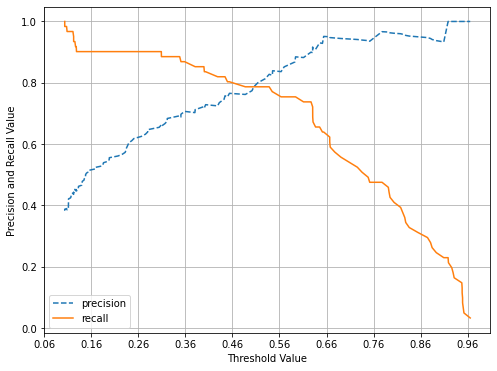

In [52]:
precision_recall_curve_plot(y_test, pred_proba_class1)

- 어느 한 쪽만 높이는 수단으로 사용돼서는 안 됨
    - 예) 암환자를 제대로 파악하기 위해 재현율을 높일 경우 정밀도가 떨어져 암환자라고 예측했으나 실제로는 아니어서 불필요한 수술을 하게 되는 경우가 생긴다.

## 4. F1 Score
- 정밀도와 재현율의 조화 평균
$F_1 = 2 \cdot \dfrac {1}{\dfrac {1}{Precision} + \dfrac{1}{Recall}} = 2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}$

In [53]:
# 정밀도 0.9, 재현율 0.1인 경우
p = .9; r = .1
F1 = 2*(1/(1/p+1/r))
print('정밀도 {}, 재현율 {}인 경우 F1 : {:.3f}'.format(p, r, F1))

# 정밀도 0.5, 재현율 0.5인 경우
p = .5; r = .5
F1 = 2*(1/(1/p+1/r))
print('정밀도 {}, 재현율 {}인 경우 F1 : {:.3f}'.format(p, r, F1))

정밀도 0.9, 재현율 0.1인 경우 F1 : 0.180
정밀도 0.5, 재현율 0.5인 경우 F1 : 0.500


In [57]:
from sklearn.metrics import f1_score

# 정확도, 정밀도, 재현율, F1 스코어 출력
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.3f}, 정밀도 : {precision:.3f}, 재현율 : {recall:.3f}, F1 : {f1:.3f}')

In [60]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787, F1 : 0.780


In [63]:
thresholds = np.arange(0.4, 0.65, 0.05)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값 : 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.832, 정밀도 : 0.718, 재현율 : 0.836, F1 : 0.773

임계값 : 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849, 정밀도 : 0.766, 재현율 : 0.803, F1 : 0.784

임계값 : 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787, F1 : 0.780

임계값 : 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866, 정밀도 : 0.836, 재현율 : 0.754, F1 : 0.793

임계값 : 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877, 정밀도 : 0.882, 재현율 : 0.738, F1 : 0.804



## G measure
- 정밀도와 재현율의 기하 평균  
$G = \sqrt{Precision \times Recall}$

In [64]:
# 정밀도 0.9, 재현율 0.1인 경우
p = .9; r = .1
G = np.sqrt(p*r)
print('정밀도 {}, 재현율 {}인 경우 G : {:.3f}'.format(p, r, G))

# 정밀도 0.5, 재현율 0.5인 경우
p = .5; r = .5
G = np.sqrt(p*r)
print('정밀도 {}, 재현율 {}인 경우 G : {:.3f}'.format(p, r, G))

정밀도 0.9, 재현율 0.1인 경우 G : 0.300
정밀도 0.5, 재현율 0.5인 경우 G : 0.500


# 5. ROC Curve, AUC
## ROC(Receiver Operating Characteristic)
- 민감도(Sensitivity, 재현율) = TP / (FN+TP)
    - 실제로 Positive인데 Positive로 예측한 비율
- 특이성(Specificity, TNR) = TN / (TN+FP)
    - 실제로 Negative인데 Negative로 예측한 비율
- FPR(False Positive Rate) = FP / (TN+FP) = 1 - 특이성
    - 실제로 Negative인데 Positive로 예측한 비율
    
![ROC mat](../data/ROC_mat.png)

## ROC Curve
- x축은 FPR(1-특이성), y축은 민감도로 한 그래프

In [66]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# FPR(1-특이도), TPR(민감도), 임계치
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)

print('임계값 samples :', np.round(thresholds[thr_index], 3))
print('FPR samples :', np.round(fprs[thr_index], 3))
print('TPR samples :', np.round(tprs[thr_index], 3))

임계값 samples : [0.965 0.654 0.63  0.563 0.454 0.4   0.348 0.148 0.125 0.112 0.108]
FPR samples : [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
TPR samples : [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [68]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 3))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()

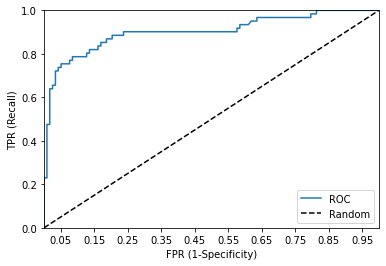

In [69]:
roc_curve_plot(y_test, pred_proba_class1)

## AUC
- Area Under Curve

In [71]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
roc_score

0.9024034454015005

In [82]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    
    roc_score = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.3f}, 정밀도 : {precision:.3f}, 재현율 : {recall:.3f}, F1 : {f1:.3f}, ROC AUC : {roc_score:.3f}')

In [86]:
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849, 정밀도 : 0.774, 재현율 : 0.787, F1 : 0.780, ROC AUC : 0.902


# 6. 연습 문제

<center> A </center>  

| 예측/실제 | P    | N    | Sum  |
| --------- | ---- | ---- | ---- |
| **P**     | 45   | 5    | 50   |
| **N**     | 5    | 45   | 50   |
| **Sum**   | 50   | 50   | 100  |
<br>  
  
<center> B </center>

| 예측/실제 | P    | N    | Sum  |
| --------- | ---- | ---- | ---- |
| **P**     | 100   | 20    | 120   |
| **N**     | 0    |80   | 80   |
| **Sum**   | 100   | 100   | 200  |

#### 1. Accuracy
- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- A : 90/100 = 0.900
- B : 180/200 = 0.900

#### 2. Precision
- Precision = TP / (TP + FP)
- A : 45/50 = 0.900
- B : 100/120 = 0.833

#### 3. Recall
- Recall = TP / (TP + FN)
- A : 45/50 = 0.900
- B : 100/100 = 1.000

#### 4. TPR
- TPR = Sensitivity = Recall
- A : 0.900
- B : 1.000

#### 5. FPR
- FPR = 1 - Specificity = 1 - TN / (TN + FP) = FP / (TN + FP)
- A : 5/50 = 0.100
- B : 20/100 = 0.200
